Predictive analytics is a powerful approach for extracting insights from data and guiding data-informed decision-making. In this notebook, I delve into predictive analysis using a LinkedIn dataset as the foundation. My primary focus is on predicting "Engagements," a critical metric in the realm of social media. Engagements encompass various interactions with content, such as likes, shares, reactions, comments, and saves. These interactions signify how many individuals have not only viewed but actively engaged with the content. I leverage the carefully selected features retained throughout my analysis to achieve these predictions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/user/Downloads/DiceyTechHack"
data = pd.read_csv(path +"/LinkedInData.csv")

In [3]:
data.head(2)

,Date,Content Type,Sent by,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Tags
0,7/13/2023 12:03,Photo,Blessing Ubah,Your money should not be a gamble. Before you ...,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,CIB Posts
1,7/12/2023 20:00,Text,Blessing Ubah,"What skill (s) do you have, that no one ever t...",0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,Other


In [4]:
data["Date"] = pd.to_datetime(data["Date"])
data["PostHour"] = data["Date"].dt.hour
data["PostMonth"] = data["Date"].dt.month_name()
data["PostYear"] = data["Date"].dt.year
data["num_post_words"] = data["Post"].str.len()

In [6]:
data["num_post_words"].fillna(0, inplace = True)

In [7]:
data.isnull().sum()

Date                                 0
Content Type                         0
Sent by                              0
Post                                31
Impressions                          0
Organic Impressions                  0
Engagement Rate (per Impression)     0
Engagements                          0
Reactions                            0
Likes                                0
Comments                             0
Shares                               0
Click-Through Rate                   0
Post Link Clicks                     0
Post Clicks (All)                    0
Video Views                          0
Organic Video Views                  0
Tags                                 0
PostHour                             0
PostMonth                            0
PostYear                             0
num_post_words                       0
dtype: int64

In [8]:
data.drop("Post", axis=1, inplace=True)
data.drop("Date", axis=1, inplace=True)

In [9]:
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 16 numeric and 4 categorical columns in train data


In [10]:
corr = numeric_data.corr()
print(corr["Engagements"].sort_values(ascending = False))

Engagements                         1.000000
Post Link Clicks                    0.988196
Post Clicks (All)                   0.988196
Click-Through Rate                  0.731046
Impressions                         0.675249
Organic Impressions                 0.675249
Reactions                           0.630985
Likes                               0.630985
Shares                              0.241240
Comments                            0.230506
PostYear                            0.068610
num_post_words                      0.057447
Engagement Rate (per Impression)    0.046432
PostHour                            0.035876
Video Views                         0.022281
Organic Video Views                 0.022281
Name: Engagements, dtype: float64


In [11]:
X = data.drop(["Engagements"],axis=1)
y = data["Engagements"]

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

def processing_data(dataa):
     processed_data = data.copy()

     categ = ["Content Type",
              "Sent by",
              "Tags",
              "PostMonth"]
    
     for col in categ:
        processed_data[col] = le.fit_transform(processed_data[col])

     return pd.DataFrame(processed_data, columns = processed_data.columns) 

In [14]:
processed_X = processing_data(X)

In [15]:
processed_X.shape

(7760, 20)

In [16]:
processed_X.head(2)

,Content Type,Sent by,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Tags,PostHour,PostMonth,PostYear,num_post_words
0,2,2,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,39,12,5,2023,276.0
1,4,2,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,69,20,5,2023,90.0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression,RFE
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

In [18]:
X_train,X_test,y_train,y_test = train_test_split(processed_X,y,test_size=0.2,random_state=42)

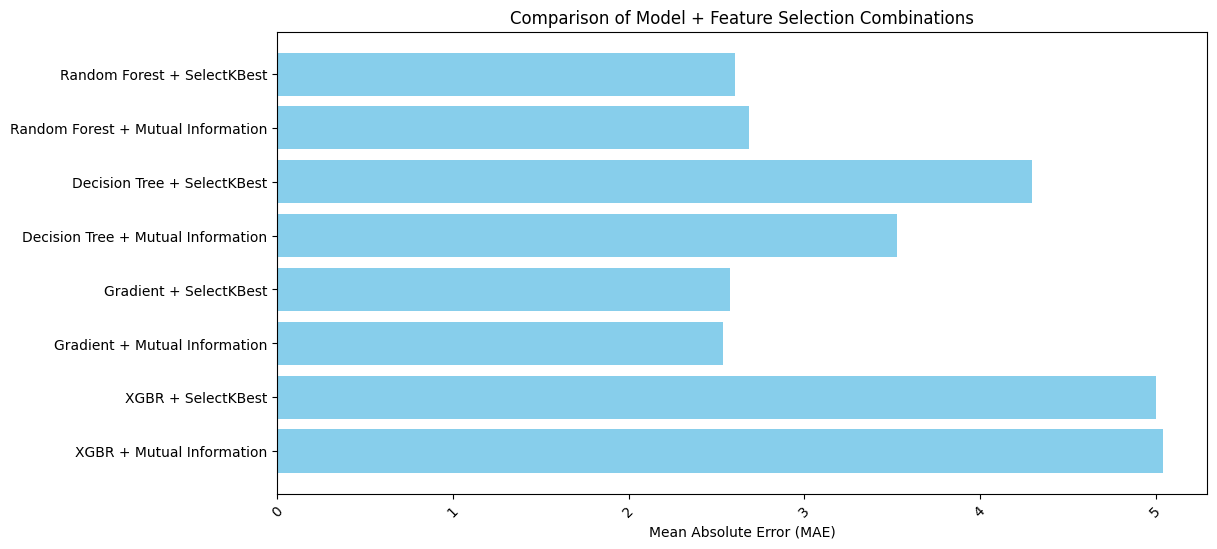

In [19]:
X_train,X_test,y_train,y_test = train_test_split(processed_X,y,test_size=0.2,random_state=42)

plt.figure(figsize=(12, 6))
plt.barh(results_df['Combination'], results_df['MAE'], color='skyblue')
plt.xlabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.title('Comparison of Model + Feature Selection Combinations')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

In [20]:
k = 17
selector = SelectKBest(score_func=f_regression,k=k)
X_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)

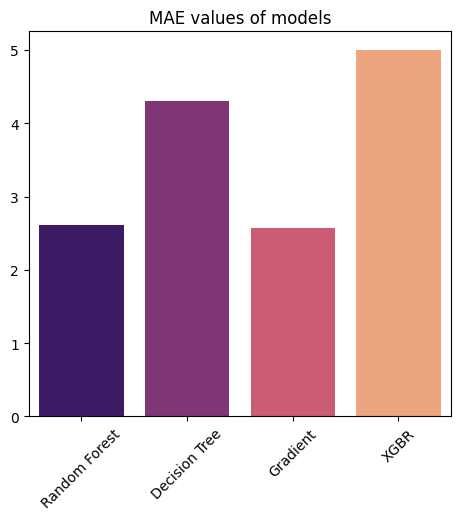

In [21]:
models = {
          "Random Forest":RandomForestRegressor(random_state=42),
          "Decision Tree":DecisionTreeRegressor(random_state=42),
          "Gradient":GradientBoostingRegressor(random_state=42),
          "XGBR":XGBRegressor(random_state=42)
          } 
mae_values= []

for name, model in models.items():
     model.fit(X_selected,y_train)
     preds = model.predict(X_test_selected)
     accuracy =mean_absolute_error(y_test,preds)
     mae_values.append(accuracy)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.barplot(x= list(models.keys()), y = mae_values, palette = "magma")
plt.title("MAE values of models")
plt.xticks(rotation=45)
plt.show()

In [22]:
gb = GradientBoostingRegressor()
gb.fit(X_selected,y_train)
y_pred = gb.predict(X_test_selected)
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE of Random Forest is {mae:.4f}")

MAE of Random Forest is 2.2247
